Simplex query for Peacocks.
Derived from matlab code: poly_query_peacock.mlx

In [2]:
from pathlib import Path
# Load the softmax encodings of the data

from sisap2023.similarity import load_mf_encodings

smData = load_mf_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_mf_encodings(Path("/Volumes/Data/mf_dino2")) # load encodings

from sisap2023.similarity import l1_norm

allData = l1_norm(allData)

In [7]:
from sisap2023.count_cats import get_best_cat_index


tabby_cat = 281
tiger_cat = 282
persian_cat = 283
siamese_cat = 284
egyptian_cat = 285
# cougar_cat = 286
# lynx_cat = 287
leopard_cat  = 288


best_100_tabby = get_best_cat_index(tabby_cat,smData)[0:100]
best_100_tiger = get_best_cat_index(tiger_cat,smData)[0:100]
best_100_persian = get_best_cat_index(persian_cat,smData)[0:100]
best_100_siamese = get_best_cat_index(siamese_cat,smData)[0:100]
best_100_egyptian = get_best_cat_index(egyptian_cat,smData)[0:100]
best_100_leopard = get_best_cat_index(leopard_cat,smData)[0:100]



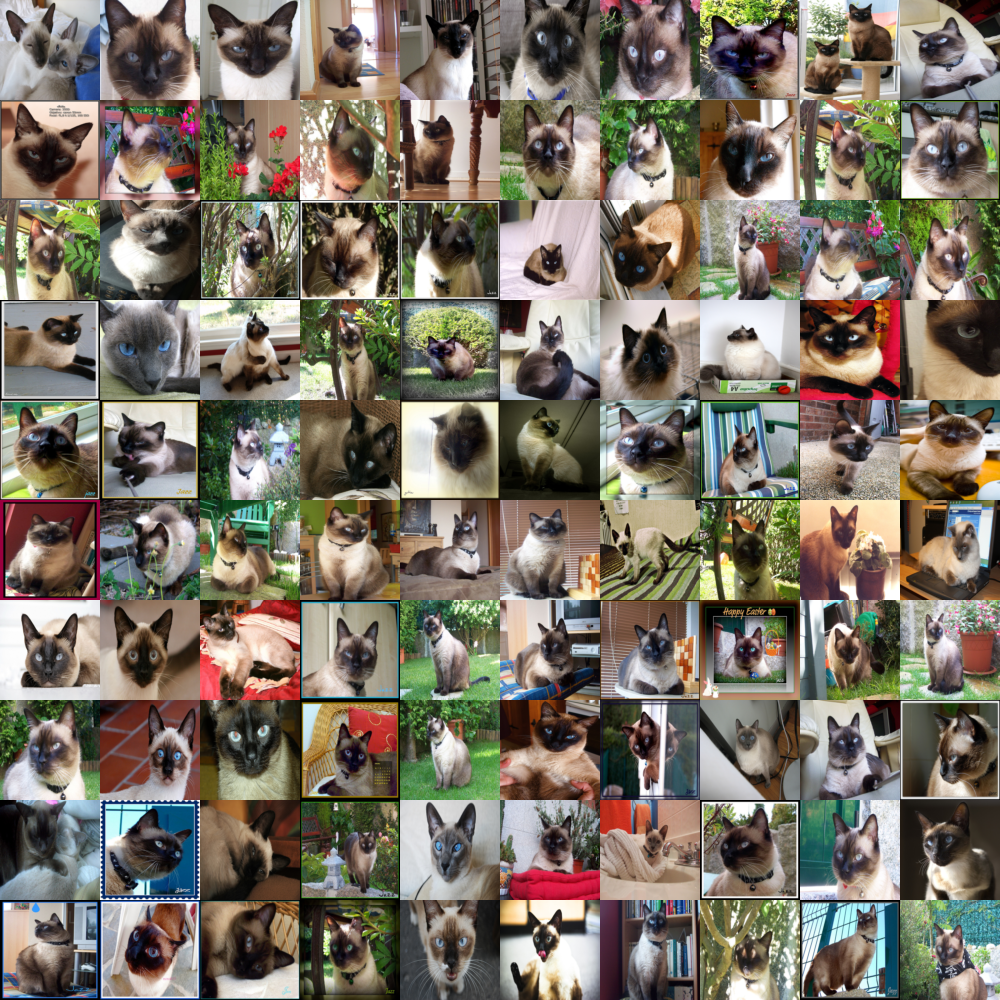

In [4]:
# These are the best images best on lowest average distance from the queries

from sisap2023.similarity import make_mf_image_grid

make_mf_image_grid(best_100_siamese,10,10,100,100)

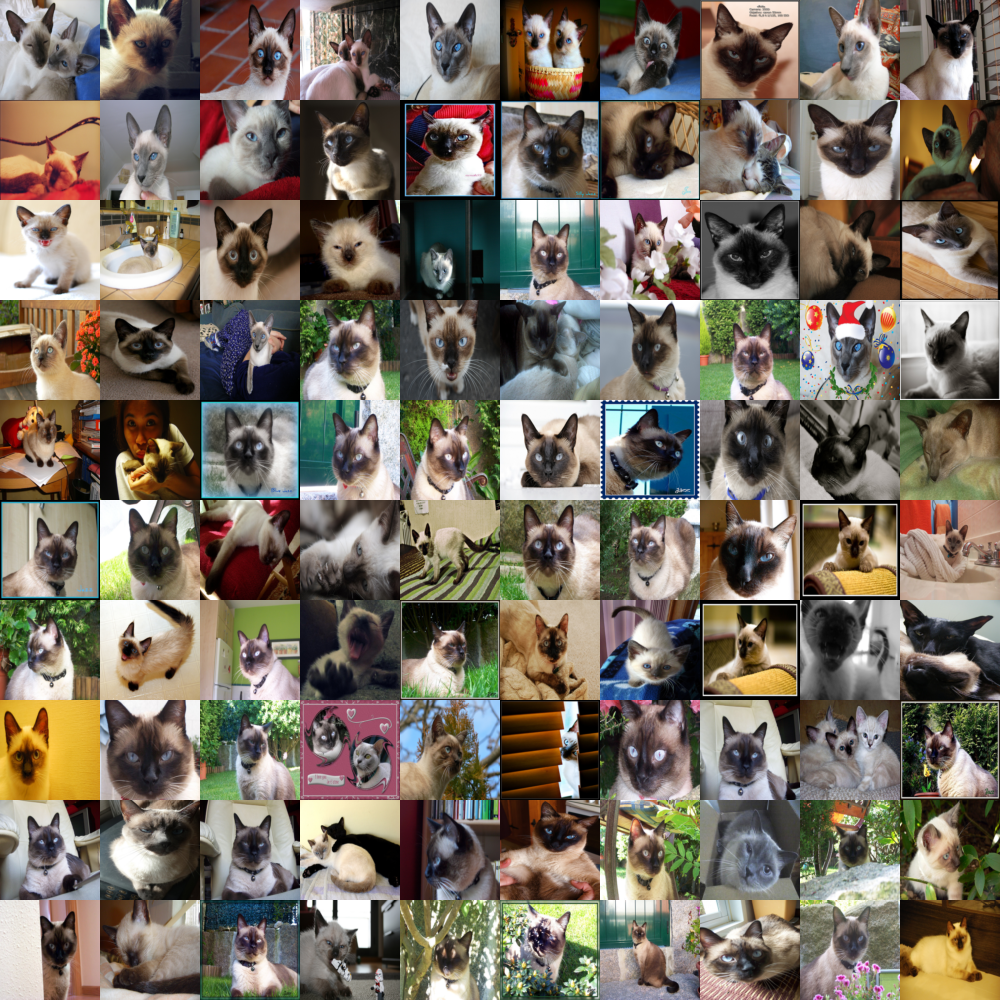

In [12]:
import numpy as np
from sisap2023.similarity import euclid
distances = euclid(allData[best_100_siamese[0]], allData)
sorted_indices = np.argsort(distances)
top_100_indices = sorted_indices[:100]
make_mf_image_grid(top_100_indices, 10, 10, 100, 100)

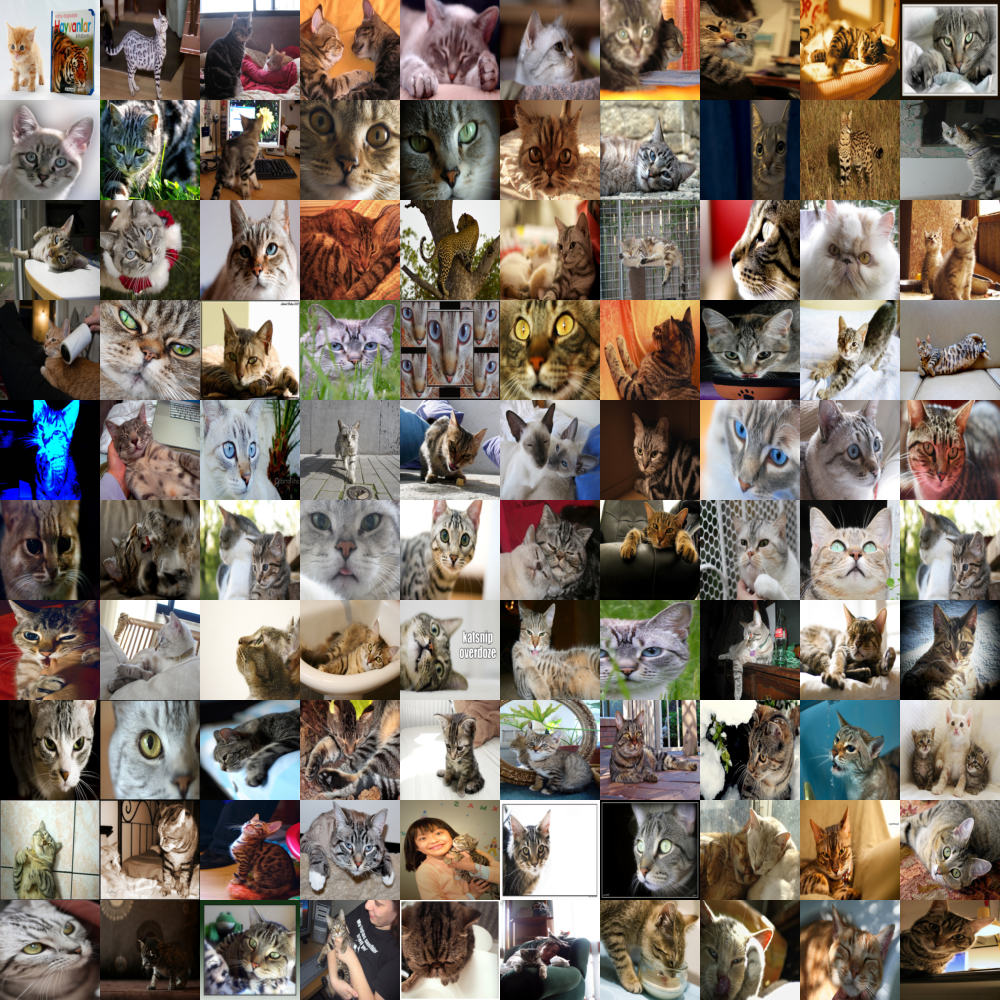

In [8]:
from sisap2023.msedOO import msedOO
import numpy as np

base_data = np.vstack((allData[best_100_tabby[0]],allData[best_100_tiger[0]],allData[best_100_persian[0]],allData[best_100_siamese[0]],allData[best_100_egyptian[0]],allData[best_100_leopard[0]]))   

base = msedOO(base_data)  # form the base simplex 

complexities = base.msed(allData)

complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]
make_mf_image_grid(top_100,10,10,100,100)
